<a href="https://colab.research.google.com/github/javedmatrah/AIQ2/blob/main/Reuters_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.5 Classifying newswires: a multiclass classification example
you’ll build a network to classify Reuters newswires into 46 mutually exclusive topics<br>
multi-class classification<br>
single-label, multiclass classification.<br>
If each data point could belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.3.5 Classifying newswires: a multiclass classification example
you’ll build a network to classify Reuters newswires into 46 mutually exclusive topics
multi-class classification
single-label, multiclass classification.
If each data point could belong to multiple categories (in this case, topics), you’d be facing a multilabel, multiclass classification problem.

#3.5.1 The Reuters dataset
published in 1986<br>
there are 46 differents topics<br>
this is available in keras datasets

#Listing 3.12 Loading the Reuters dataset

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


As with the IMDB dataset, the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data. You have 8,982 training examples and 2,246 test examples:

In [2]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
i = 1
print(len(train_data[i]))
train_data[i]

56


[1,
 3267,
 699,
 3434,
 2295,
 56,
 2,
 7511,
 9,
 56,
 3906,
 1073,
 81,
 5,
 1198,
 57,
 366,
 737,
 132,
 20,
 4093,
 7,
 2,
 49,
 2295,
 2,
 1037,
 3267,
 699,
 3434,
 8,
 7,
 10,
 241,
 16,
 855,
 129,
 231,
 783,
 5,
 4,
 587,
 2295,
 2,
 2,
 775,
 7,
 48,
 34,
 191,
 44,
 35,
 1795,
 505,
 17,
 12]

Here’s how you can decode it back to words, in case you’re curious.

##Listing 3.13 Decoding newswires back to text

In [8]:
text = "my name is Javed Ahmad"

dic = {}
for k,v in enumerate(text.split(" ")):
    dic[v]=k
dic    


{'Ahmad': 4, 'Javed': 3, 'is': 2, 'my': 0, 'name': 1}

In [9]:
word_index = reuters.get_word_index()
print(len(word_index))
word_index

565248/550378 [==============================] - 0s 0us/step
30979


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [10]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [14]:
i = 3
import numpy as np

decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') 
     for i in train_data[i]])

print(train_labels[i])
print(len(np.unique(train_labels)))
decoded_newswire

4
46


"? the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely ? borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in ? financial eligibility standards indicated as many as one half of ? borrowers who received new loans from the agency in 1986 would be ? under the proposed system the agency has proposed evaluating ? credit using a variety of financial ratios instead of relying solely on ? ability senate agriculture committee chairman patrick leahy d vt ? the proposed eligibility changes telling ? administrator ? clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last resort toward becoming a big city bank but

In [15]:
train_labels[3]

4

In [16]:
print(len(train_data[3]))

224


In [17]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

#3.5.2 Preparing the data
##Listing 3.14 Encoding the data

In [19]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [20]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

###Change label with one-hot-encode

In [22]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [23]:
one_hot_train_labels[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

##Listing 3.15 Model definition

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

##Listing 3.16 Compiling the model

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##3.5.4 Validating your approach

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

##Listing 3.18 Training the model

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 2.7000 - accuracy: 0.5405 - val_loss: 1.8241 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4601 - accuracy: 0.7096 - val_loss: 1.3893 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0752 - accuracy: 0.7707 - val_loss: 1.1656 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8496 - accuracy: 0.8156 - val_loss: 1.0869 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6848 - accuracy: 0.8554 - val_loss: 0.9974 - val_accuracy: 0.7820
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5496 - accuracy: 0.8847 - val_loss: 0.9401 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4470 - accuracy: 0.9062 - val_loss: 0.9048 - val_accuracy: 0.8180
Epoch 8/20
16

##Listing 3.19 Plotting the training and validation loss

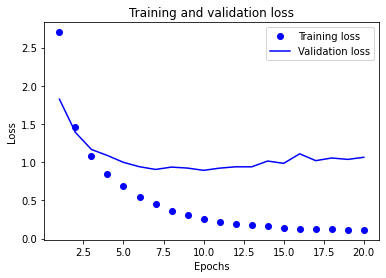

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Listing 3.20 Plotting the training and validation accuracy

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

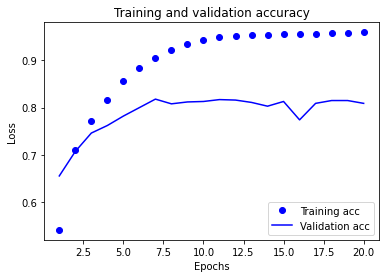

In [30]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Listing 3.21 Retraining a model from scratch

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels) # final check on testing data

Epoch 1/8
16/16 [==============================] - 3s 133ms/step - loss: 2.6166 - accuracy: 0.5385 - val_loss: 1.7313 - val_accuracy: 0.6620
Epoch 2/8
16/16 [==============================] - 2s 101ms/step - loss: 1.3906 - accuracy: 0.7130 - val_loss: 1.2860 - val_accuracy: 0.7280
Epoch 3/8
16/16 [==============================] - 2s 100ms/step - loss: 1.0197 - accuracy: 0.7853 - val_loss: 1.1190 - val_accuracy: 0.7610
Epoch 4/8
16/16 [==============================] - 2s 100ms/step - loss: 0.8008 - accuracy: 0.8262 - val_loss: 1.0532 - val_accuracy: 0.7650
Epoch 5/8
16/16 [==============================] - 2s 106ms/step - loss: 0.6386 - accuracy: 0.8634 - val_loss: 0.9582 - val_accuracy: 0.8030
Epoch 6/8
16/16 [==============================] - 1s 68ms/step - loss: 0.5067 - accuracy: 0.8940 - val_loss: 0.9351 - val_accuracy: 0.7990
Epoch 7/8
16/16 [==============================] - 1s 56ms/step - loss: 0.4126 - accuracy: 0.9117 - val_loss: 0.9120 - val_accuracy: 0.8080
Epoch 8/8
71/71

In [32]:
results

[0.9926812052726746, 0.7782725095748901]

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case it’s closer to 19%, so the results seem pretty good, at least when compared to a random baseline:

In [33]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19857524487978628

#3.5.5 Generating predictions on new data
##Listing 3.22 Generating predictions for new data

In [34]:
predictions = model.predict(x_test)

In [35]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [38]:
model.predict(x_test[0:10])

array([[2.41965681e-04, 9.46388987e-04, 1.49968793e-04, 6.68940187e-01,
        2.93225616e-01, 2.86111841e-04, 1.28591666e-03, 3.20473278e-04,
        1.66837021e-03, 1.47276689e-04, 1.89423066e-04, 4.18757182e-03,
        1.08915509e-03, 4.15538030e-04, 2.24427014e-04, 5.31045778e-04,
        8.64411891e-03, 2.64244911e-04, 3.81241291e-04, 4.94275102e-03,
        3.85446241e-03, 9.33732255e-04, 3.00214870e-05, 1.07143933e-04,
        5.75218946e-05, 9.60221339e-04, 7.62051495e-05, 5.42599882e-04,
        8.46464318e-05, 2.93165183e-04, 1.25619248e-04, 2.76525941e-04,
        1.26810148e-04, 2.30841353e-04, 1.49486517e-03, 4.93969528e-05,
        8.52055149e-04, 1.04391795e-04, 8.15398816e-05, 6.70632522e-04,
        1.35823168e-04, 1.35598486e-04, 1.45584752e-04, 4.96320892e-04,
        8.65236598e-06, 4.38745556e-05],
       [4.53763679e-02, 1.45434039e-02, 1.19688241e-02, 4.62540265e-06,
        4.52608103e-03, 9.23424400e-03, 5.83931396e-05, 1.22148431e-05,
        1.34137998e-04,

In [39]:
predictions[0].shape

(46,)

In [40]:
predictions[0]

array([2.41965681e-04, 9.46388987e-04, 1.49968793e-04, 6.68940187e-01,
       2.93225616e-01, 2.86111841e-04, 1.28591666e-03, 3.20473278e-04,
       1.66837021e-03, 1.47276689e-04, 1.89423066e-04, 4.18757182e-03,
       1.08915509e-03, 4.15538030e-04, 2.24427014e-04, 5.31045778e-04,
       8.64411891e-03, 2.64244911e-04, 3.81241291e-04, 4.94275102e-03,
       3.85446241e-03, 9.33732255e-04, 3.00214870e-05, 1.07143933e-04,
       5.75218946e-05, 9.60221339e-04, 7.62051495e-05, 5.42599882e-04,
       8.46464318e-05, 2.93165183e-04, 1.25619248e-04, 2.76525941e-04,
       1.26810148e-04, 2.30841353e-04, 1.49486517e-03, 4.93969528e-05,
       8.52055149e-04, 1.04391795e-04, 8.15398816e-05, 6.70632522e-04,
       1.35823168e-04, 1.35598486e-04, 1.45584752e-04, 4.96320892e-04,
       8.65236598e-06, 4.38745556e-05], dtype=float32)

In [41]:
predictions[0].sum()

1.0000001

In [42]:
np.argmax(predictions[0])

3

In [52]:
test_labels[0]

3

In [45]:
np.argmax(predictions[1])

10

In [51]:
test_labels[1]

10

In [47]:
np.argmax(predictions[2])

1

In [50]:
test_labels[2]

1